
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 2 - Teoria Moderna do Portfolio de Markowitz</center></h1>

A presente atividade prática abordará a aplicação da Teoria Moderna do Portfolio (TMP), com a identificação da fronteira de eficiência, portfolio de menor risco, de maior Sharpe e da linha de mercado de capitais. Adicionamente, a atividade envolve a identificação das correlações das principais bolsas mundiais e uma clusterização não supervisionada, com a técnica de machine learning, denominada DBSCAN.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<h1>Tópicos</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Geração de Ativos">Geração de Ativos Simulados</a></li>
        <li><a href="#Representação Matricial">Matrizes de Covariância e Correlação dos Retornos</a></li>
        <li><a href="#Portfolio 2">Portfolio com Dois Ativos</a></li>
        <li><a href="#Portfolio N">Portfolio com N Ativos</a></li>
        <li><a href="#Portfolio Fronteira">Markowitz - Fronteira da Eficiência</a></li>
        <li><a href="#Portfolio Risco">Markowitz - Menor Risco</a></li>
        <li><a href="#Portfolio Sharpe">Markowitz - Maior Sharpe</a></li>
        <li><a href="#Portfolio Curva">Markowitz - Linha de Mercado de Capitais</a></li>
         <li><a href="#Bolsas Mundiais">Bolsas pelo Mundo</a></li>
        <li><a href="#DBSCAN">Clusterização DBSCAN</a></li>
    </ol>
</div>
<br>
<hr>

Importantes Bibliotecas Python:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<div id="Geração de Ativos">
    <h2>1) Geração de ativos simulados</h2>
</div>

Gerando um conjunto de ativos com o <b>Movimento Geometrico Browniano</b>  

<ul>
$ \large
\begin{equation} 
 p(t)  =p(0)exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>

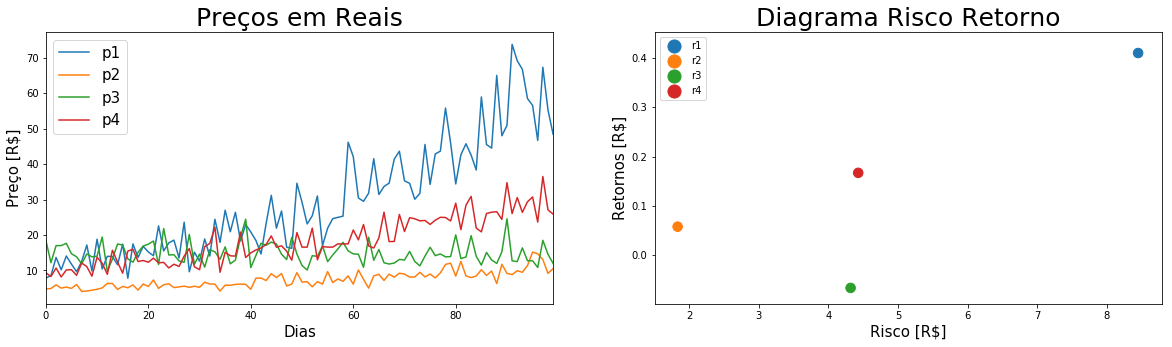

In [2]:
def MBG(po,mu,sigma,t):
    w = np.random.normal(0,1, t)
    t=np.arange(0,t)
    return po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

N=4

po=np.random.randint(20, size=N)+np.random.random(N)
mu=np.random.rand(N)/40+0.02
sigma=np.random.random(N)/10+0.15
t=100

df=None

for i in range(len(po)):
    
    if df is None:
        df=pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))
    else:
        df=pd.concat([df,pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))],axis=1)

df.columns=list(['p'+str(x) for x in range(1,len(po)+1)])

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,2, 1) 
df.plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dias',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax2=plt.subplot(1,2, 2) 
colors = np.random.rand(5)
x = df.diff().dropna().std().values
y = df.diff().dropna().mean().values
classes = df[df.columns].mean().values/df[df.columns].std().values


for i in range(len(x)):
    ax2.scatter(x[i],y[i],  s=50*classes, label='r'+str(1+i))
ax2.legend(loc='upper left')
ax2.set_xlabel("Risco [R$]",fontsize=15)
ax2.set_ylabel('Retornos [R$]',fontsize=15)
ax2.set_title('Diagrama Risco Retorno',fontsize=25) 

plt.show()

<div id="Representação Matricial">
    <h2>2) Matrizes de Covariância e Correlação dos Retornos</h2>
</div>

  <p> Considerando o escopo que envolve multiplos ativos, o processo operacional passa a ser matricial. Assim, a expectativa de retorno, $\boldsymbol{\mu}$, é um vetor de tamanho <b> Nx1</b> é definido como
 </p>&emsp;



 


 <li>$\textbf{r}(n)  = [r_1(n) \ r_2(n)  \ ... \ r_N(n) ]^T$  </li> &emsp;
  <li>$\boldsymbol{\mu}  = [\mu_1 \ \mu_2  \ ... \ \mu_N ]^T$</li> &emsp; 
  <p> E as matrizes  de   covariâcia  ($\textbf{C}$)  e   correlação  ($\textbf{P}$)  para  ativos  do  portfolio são </p>
   &emsp;
  <li>$\textbf{C} = [C_ {ij}]=E\{r_i(n)r_j(n)\}-\mu_i\mu_j$ </li>
  <p></p>
  <li>$\textbf{P} = [P_ {ij}]=\frac{E\{r_i(n)r_j(n)\}-\mu_i\mu_j}{\sigma_i\sigma_j}$</li>
  <p>Determinando a matriz diagonal de volatilidade de tamanho $NxN$ como</p>  &emsp;
  <li> $\sum=\begin{bmatrix}
    \sigma_1 & . & . & 0  \\
    . & \sigma_2 & . & .  \\
    . & . & . & .  \\
    0 & . & . & \sigma_N 
  \end{bmatrix}  $ </li> &emsp;
  <p>É possível identificar</p>  &emsp;
  <li>$\textbf{C}=E\{\textbf{r}(n)\textbf{r}^T(n)\}-\boldsymbol{\mu}\boldsymbol{\mu}^T=\sum^T\textbf{P}\sum$</li>



Preços [R$]:
          p1        p2         p3         p4
0   7.857326  4.795887  18.525909   9.364652
1   8.551739  4.904487  12.192673   8.296684
2  13.682987  5.944240  16.999506  10.686049
3  10.184930  5.021927  17.013309   8.173142
4  14.073121  5.319785  17.649503  10.147838

Retornos [R$]:
         r1        r2        r3        r4
1  0.694413  0.108600 -6.333236 -1.067967
2  5.131248  1.039753  4.806833  2.389364
3 -3.498057 -0.922313  0.013802 -2.512906
4  3.888191  0.297858  0.636195  1.974696

Matriz de Volatilidade [R$]:
         r1        r2        r3        r4
r1  8.44844  0.000000 -0.000000  0.000000
r2  0.00000  1.832892 -0.000000 -0.000000
r3 -0.00000 -0.000000  4.318061  0.000000
r4  0.00000 -0.000000  0.000000  4.427232



Text(0.5,1,'Correlações entre ativos ')

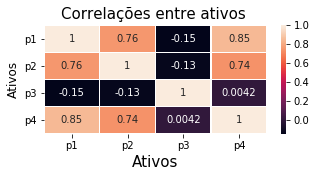

In [3]:
ret=df.diff().dropna()

ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])

C=ret.cov()

sig=ret.std()

MU=ret.sum()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=df.corr()
print()
print("Preços [R$]:")
print(df.head())
print('')
print("Retornos [R$]:")
print(ret.head(4))
print('')
print("Matriz de Volatilidade [R$]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(5, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15) 

<div id="Portfolio 2">
    <h2>3) Portfolio com dois Ativos</h2>
</div>

  <p> O <b>retorno </b>de um portfolio é a média ponderada dos retornos de seus ativos. Sendo o portfolio com 2 (dois) ativos </p>&emsp;
  <li>$r_p(n)=q_1(n)r_1(n)+q_2(n)r_2(n)$  </li> &emsp;
   <p>A <b>expectativa de retorno</b> de um portfolio com dois ativos, com $q_1+q_2=1$, é calculado por </p> &emsp;
  <li>$\mu_p = E\{r_p \}= q_1 E \{r_1 \} + q_2 E \{r_2 \}$ </li>
  <p></p>
  <p>O desvio padrão ou o <b>risco</b> do portfolio é dado por</p>  &emsp;
  <li> $\sigma_p=(E\{r_p r_p\}-E\{r_p \}E\{r_p \})^{1/2}=(q^2_1\sigma^2_1+2
  q_1q_2\sigma_1\sigma_2\rho_{12} +q^2_2\sigma^2_2 )^{1/2} $  </li> &emsp;
 
 &emsp;


In [4]:

q=[ 0.2, 0.8 ]

print()
print('Os pesos dos ativos r1 e r1 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r1,r2=ret['r1'],ret['r2']

print('O retorno e risco de r1 [R$]: %.2f e %.2f' % (np.mean(r1),np.std(r1)))
print()
print('O retorno e risco de r2 [R$]: %.2f e %.2f' % (np.mean(r2),np.std(r2)))
print()

rp=q[0]*r1+q[1]*r2

print('O retorno e risco de rp em [R$]: %.2f e %.2f' % (np.mean(rp),np.std(rp)))
print()

mup=q[0]*np.mean(r1)+q[1]*np.mean(r2)
sigp=(np.mean(np.multiply(rp,rp))-np.multiply(np.mean(rp),np.mean(rp)))**0.5

print('Alternativamente, o retorno e risco de rp [R$]: %.2f e %.2f' % (mup,sigp))
print()



Os pesos dos ativos r1 e r1 são 0.20 e 0.80, respectivamente 

O retorno e risco de r1 [R$]: 0.41 e 8.41

O retorno e risco de r2 [R$]: 0.06 e 1.82

O retorno e risco de rp em [R$]: 0.13 e 2.32

Alternativamente, o retorno e risco de rp [R$]: 0.13 e 2.32



<div id="Portfolio N">
    <h2>4) Portfolio com N Ativos</h2>
</div>

  <p> Ampliando o conceito para <b>N-ativos
do portfolio</b>. O retorno para N-ativos de um portfolio é expresso como </p>&emsp;
  <li>$r_p=\textbf{q}^T\textbf{r}=\sum_{i=1}^{n}q_ir_i$  </li> &emsp;
   <p>Onde $q$ e um vetor $Nx1$ relacionado à alocação de capital e definido por</p>
   &emsp;
  <li>$\boldsymbol{q}  = [q_1 \ q_2  \ ... \ q_N ]^T$ </li>
  <p></p>
  <p>Assim, a <b>expectativa de retorno</b> do portfolio é calculado por</p>  &emsp;
  <li> $\mu_p = E\{r_p\} = \boldsymbol{q}^T E\{\textbf{r}\} = \boldsymbol{q}^T  \boldsymbol{\mu} $  </li> &emsp;
   <p>E o seu <b>risco</b> como</p>  &emsp;
  <li> $\sigma_p = (E\{r_p^2 \}-\mu_p^2)^{1/2}= (\boldsymbol{q}^T  \textbf{C} \boldsymbol{q})^{1/2}$  </li> &emsp;


In [5]:
q=np.array([0.2, 0.8])
print()
print('Os pesos dos ativos r1 e r1 são %.2f e %.2f, respectivamente ' % (q[0],q[1]))
print()

r=ret[['r1','r2']]

C=r.cov()
MU=r.mean()

retp=np.dot(pd.DataFrame(q).transpose(),MU)

risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),np.array(q)))

print('O retorno e risco de rp em [R$]: %.2f e %.2f' % (retp,risp))
print()
print('Porque diferente??')


Os pesos dos ativos r1 e r1 são 0.20 e 0.80, respectivamente 

O retorno e risco de rp em [R$]: 0.13 e 2.33

Porque diferente??


In [6]:
import random
N=len(ret.columns)
q = [random.randint(0,1000) for i in range(1,N+1)]
s = sum(q)
q = [ i/s for i in q ]
rp=np.dot(ret,q)
C=ret.cov()
MU=ret.mean()
retp=np.dot(pd.DataFrame(q).transpose(),MU)
risp=np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))
[q, retp[0],risp[0][0]]

print()
print('Os pesos dos ativos são:',[round(q[i],2) for i in range(len(q))])
print()
print('O retorno e risco de rp em [R$]: %.2f e %.2f' % (retp[0], risp[0][0]))
print()


Os pesos dos ativos são: [0.26, 0.09, 0.52, 0.13]

O retorno e risco de rp em [R$]: 0.10 e 2.99



Text(0.5,1,'1000 Portifolios')

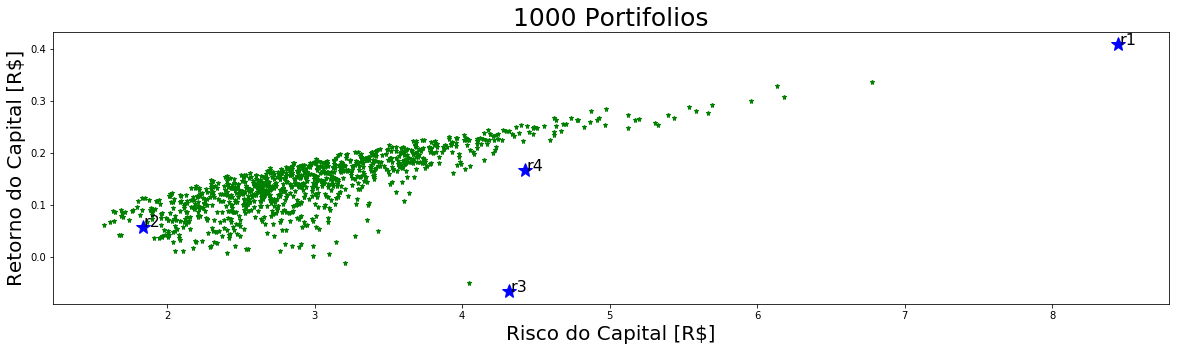

In [7]:
retp=[]
risp=[]

C=ret.cov()
MU=ret.mean()
SIG=ret.std()
for i in range(1000):
    q = [random.randint(0,10000) for i in range(1,N+1)]
    s = sum(q)
    q = [ i/s for i in q ]

    retp.append(np.dot(pd.DataFrame(q).transpose(),MU)[0])
    risp.append(np.sqrt(np.dot(np.dot(pd.DataFrame(q).transpose(),C),pd.DataFrame(q)))[0][0])

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1)     
for p in range(0,len(retp)):
    ax1.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#    ax1.text(100*(sig[p]+0.001), 100*MU[p],df.columns[p], fontsize=8)

for p in range(0,len(SIG)):
    ax1.plot(SIG[p], MU[p], 'b*', markersize=15.0) 
    ax1.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

ax1.set_ylabel("Retorno do Capital [R$]",fontsize=20)
ax1.set_xlabel("Risco do Capital [R$]",fontsize=20)
ax1.set_title(str(len(retp))+" Portifolios",fontsize=25)   
#ax1.axis([100*(np.min(sig)*0.1),100*(np.max(sig)*1.2),100*(np.min(MU)-0.001),100*(np.max(MU)+0.001)])


<div id="Portfolio Fronteira">
    <h2>5) Markowitz - Fronteira da Eficiência</h2>
</div>



<p>Na teoria moderna do portfolio, a <b>otimização do portfolio</b> é obtida minimizando o risco do portfolio, $\sigma_p$, com a restrição de que o retorno esperado do portfolio, $\mu_p$, seja igual a uma constante, $\mu$ , ou seja, 
</p> 



  <li>$\mu_p = \boldsymbol{q}^T  \boldsymbol{\mu} =\sum_{i=1}^{N}q_i\mu_i=\mu$  </li> &emsp;
  
  <p> Uma restrição adicional, é o capital de investimento constante do portfolio, ou seja, </p>
   &emsp;
  <li>$\boldsymbol{q}^T  \boldsymbol{1} =\sum_{i=1}^{N}q_i=1$ </li>
 
  <p>O problema de minimização do risco para criar um portfolio eficiente, sujeito às restrições indicadas, pode ser resolvido com a introdução de dois multiplicadores Lagrangianos. Nós escrevemos o Lagrangiano para este problema como</p>  &emsp;
  <li>$L(\boldsymbol{q},\lambda_{1},\lambda_{2})=\frac{1}{2}\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q}+\lambda_{1}(\mu-\boldsymbol{q}^{T}\boldsymbol{\mu})+\lambda_{2}(1-\boldsymbol{q}^{T}\boldsymbol{1})$  </li> &emsp;
  
  
  
  <p>O vetor ótimo de alocação de investimento é calculado definindo as derivadas parciais para zero, como a seguir</p>  &emsp;
 <li>$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \lambda_{1}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda_{1},\lambda_{2})}{\partial \lambda_{2}}=0$ </li> 

 &emsp;
   <p>Estas equações levam à seguinte solução para o investimento ideal para o vetor de alocação</p>  &emsp;
  <li>$
  \boldsymbol{q}^{*} = \frac{
  \begin{vmatrix} \mu & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}  \\ 1 & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1}   \\  \end{vmatrix}\boldsymbol{C}^{-1}\boldsymbol{\mu} + 
  \begin{vmatrix} \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu} & \mu  \\ \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} & 1  \\  \end{vmatrix}\boldsymbol{C}^{-1}\boldsymbol{1}  }
  {
  \begin{vmatrix} \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}& \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{\mu}  \\ \boldsymbol{\mu}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} & \boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1} \\  \end{vmatrix}}
$</li>



Text(0.5,0,'Risco do Capital [R$]')

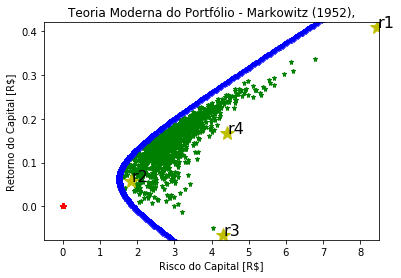

In [8]:
ONE=np.ones(len(ret.columns))
N=1000
reto=pd.DataFrame(np.zeros((N,1)))
risk=pd.DataFrame(np.zeros((N,1)))

a=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
b=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(MU)))
c=np.dot(pd.DataFrame(MU).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
d=np.dot(pd.DataFrame(ONE).transpose(),np.dot(np.linalg.inv(C),pd.DataFrame(ONE)))
target_mus=np.arange(-0.5,0.5,0.002)
risk_at_target_mus=np.zeros(len(target_mus))
for i in range(0, len(target_mus)):
    target_mu=target_mus[i]
    v1=np.linalg.det([[target_mu,b[0][0]],[1,d[0][0]]])*np.dot(np.linalg.inv(C),pd.DataFrame(MU))
    v2=np.linalg.det([[a[0][0],target_mu],[c[0][0],1]])*np.dot(np.linalg.inv(C),pd.DataFrame(ONE))
    v3=np.linalg.det([[a[0][0],b[0][0]],[c[0][0],d[0][0]]])
    opt_q=(v1+v2)/v3
    risk_at_target_mus[i]=(np.dot(np.dot(pd.DataFrame(opt_q).transpose(),C),pd.DataFrame(opt_q)))**0.5
fig = plt.subplots()

for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)
plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])

for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

plt.plot(risk,reto,'r*')
plt.plot(risk_at_target_mus,target_mus,'b*')
#plt.axis([-0.5,np.max(100*SIG),0,np.max(100*MU)])
plt.title('Teoria Moderna do Portfólio - Markowitz (1952),')
plt.ylabel('Retorno do Capital [R$]')
plt.xlabel('Risco do Capital [R$]')


<div id="Portfolio Risco">
    <h2>6) Markowitz - Menor Risco</h2>
</div>




  <p>Existe apenas uma carteira eficiente na condição de <b> menor risco</b>, estabelecida pela otimização do Lagrangiano
 </p>&emsp;
  <li>$L(\boldsymbol{q},\lambda)=\frac{1}{2}\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q}+\lambda(1-\boldsymbol{q}^{T}\boldsymbol{1})$   </li> &emsp;
   <p>ao atender as seguintes derivadas parciais para zero</p>
   &emsp;
  <li>$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \lambda}=0$ </li>
  <p></p>
  <p>Essas equações levam à seguinte solução para a alocação de investimentos do vetor da carteira de risco mínimo</p>  &emsp;
  <li>$\boldsymbol{q}_{min} = \frac{\boldsymbol{C}^{-1}\boldsymbol{1}}{\boldsymbol{1}^{T}\boldsymbol{C}^{-1}\boldsymbol{1}}$  </li> &emsp;
   <p>Reforçando, o portfólio de risco mínimo é único.</p>  




Os pesos dos ativos no portifólio de menor risco: [0.03, 0.73, 0.15, 0.09]



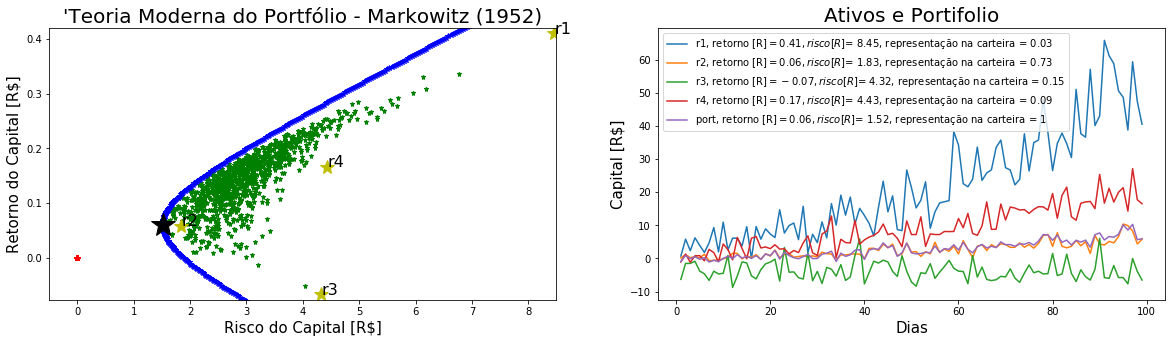

In [9]:
q_minrisk=np.dot(np.linalg.inv(C),pd.DataFrame(ONE))/d
mu_minrisk=np.dot(q_minrisk.transpose(),MU.values)
risk_minrisk=(np.dot(np.dot(pd.DataFrame(q_minrisk).transpose(),C),pd.DataFrame(q_minrisk)))**0.5

fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,2, 1) 

for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)


ax1.plot(risk,reto,'r*')
ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])

for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

if 'port' in ret.columns: 
    ret=ret.drop(columns=['port'])


ret['port']=pd.DataFrame(ret*[q_minrisk[i][0] for i in range(len(q_minrisk))]).sum(axis=1)
pesos=[q_minrisk[i][0] for i in range(len(q_minrisk))]+[1]
ax1.set_xlabel("Risco do Capital [R$]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [R$]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [R$]= "+str(round(ret.mean()[i],2)) +", risco [R$]= "+str(round(ret.std()[i],2))
    ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
ax2.legend(loc='upper left')


ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [R$]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(q_minrisk[i][0],2) for i in range(len(q_minrisk))])
print()

<div id="Portfolio Sharpe">
    <h2>7) Markowitz - Maior Sharpe</h2>
</div>



  <p>A carteira que esteja dentro da bala de Markowitz, com a seguinte inclinação, corresponde a de <b>maior Sharpe</b>
  </p>&emsp;
  <li>$\frac{\boldsymbol{q}^{T}\boldsymbol{\mu}-r_f}{(\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q})^{1/2}}$  </li> 
   <p>A carteira <b>Sharpe</b> ou de mercado é aquela que maximiza essa inclinação sujeita à restrição que $\boldsymbol{q}^T  \boldsymbol{1} =1$. Semelhante ao problema de otimização de portfólio discutido anteriormente, definimos o Lagrangeano da seguinte forma </p>
   &emsp;
  <li>$L(\boldsymbol{q},\lambda)=\frac{\boldsymbol{q}^{T}\boldsymbol{\mu}-r_f}{(\boldsymbol{q}^{T}\boldsymbol{C}\boldsymbol{q})^\frac{1}{2}}+\lambda(1-\boldsymbol{q}^{T}\boldsymbol{1})$  </li>&emsp;
    <li>$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \boldsymbol{q}}=0$,
$\frac{\partial L(\boldsymbol{q},\lambda)}{\partial \lambda}=0$ </li>
  
  <p></p>
  <p>Essas equações nos levam à seguinte solução para o investimento vetor de alocação da carteira de mercado</p>  &emsp;
  <li>$\boldsymbol{q}_{M} = \frac{\boldsymbol{C}^{-1}(\boldsymbol{\mu}-r_f\boldsymbol{1})}
			     {\boldsymbol{1}^{T}\boldsymbol{C}^{-1}(\boldsymbol{\mu}-r_f\boldsymbol{1})}$  </li> 
   <p>Portanto, o retorno do carteira de mercado pode ser calculada como retorno esperado, $\mu_M$, e risco, $\sigma_M$, e seu risco são dados como </p>  &emsp;
<li>$r_M=\boldsymbol{q}_{M}^T\boldsymbol{r}$</li>

<li>$\mu_M=\boldsymbol{q}_{M}^T\boldsymbol{\mu}$</li> 

<li>$\sigma_M=\boldsymbol{q}_{M}^T\boldsymbol{C}\boldsymbol{q}_{M}$ </li>



Os pesos dos ativos no portifólio de menor risco: [0.17, 0.62, -0.14, 0.35]



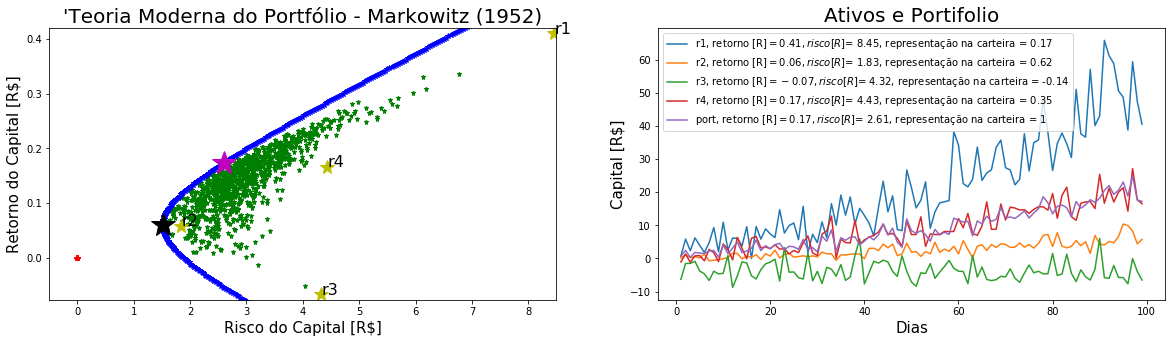

In [10]:
rf=0.002
temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
qm=temp/temp.sum()
mu_m=np.dot(qm.transpose(),MU)
sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5

fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk,reto,'r*')
ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)


plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])

for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

if 'port' in ret.columns: 
    ret=ret.drop(columns=['port'])


ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [R$]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [R$]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [R$]= "+str(round(ret.mean()[i],2)) +", risco [R$]= "+str(round(ret.std()[i],2))
    ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [R$]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()

<div id="Portfolio Curva">
    <h2>8) Linha de Mercado de Capitais</h2>
</div>




  <p>Vamos calcular o retorno de uma carteira, $r_{\hat{p}}$, na qual investimos em uma carteira livre de risco com retorno $r_f$ (uma constante) e uma carteira de ativos de risco, $r_p$,
 </p>&emsp;
  <li>$r_{\hat{p}} = q_f r_f + q_p r_p, \ \ com \ \ q_f + q_p =1$   </li> &emsp;
   <p>O retorno esperado e a variância do portfolio ${r_\hat{p}}$ é expressa como  </p> &emsp;
  <li>$E \{r_{\hat{p}}\} = r_\hat{p} = E \{q_f r_f + q_p r_p\} = q_f r_f + q_p \hat{p}_p$ </li>
    <li>$var(r_{\hat{p}}) = var(q_f r_f + q_p r_p)=q_p^2var(r_p) \Rightarrow r_{\hat{p}}=q_p\sigma_p $ </li>
  <p></p>
  <p>Assim</p>  
  
  <li>$\mu_{\hat{p}} = r_f+\sigma_{\hat{p}} \frac{\mu_{\hat{p}}-r_f}{\sigma_p}$  </li> &emsp;
  
  <p>O excesso de retorno sobre a carteira sem risco é denominado de <b>prêmio de risco</b> e a equação supracitada corresponde a <b>Linha de Mercado de Capitais</b>.
</p>  &emsp;




Os pesos dos ativos no portifólio de menor risco: [0.17, 0.62, -0.14, 0.35]



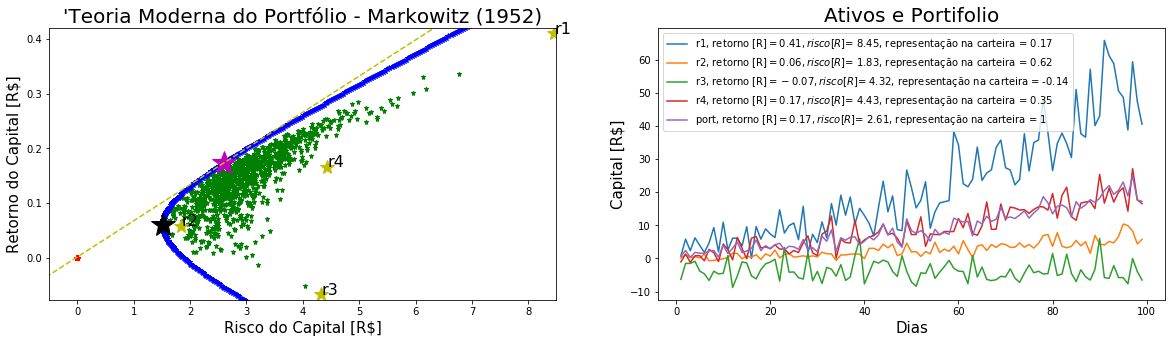

In [11]:
rf=0.002
temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
qm=temp/temp.sum()
mu_m=np.dot(qm.transpose(),MU)
sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
cm_line=sigma_m[0][0]*(target_mus-rf)/(mu_m-rf)
arbitrary_line=sig[1]*(target_mus-rf)/(MU[1]-rf)


fig = plt.subplots(figsize=(20,5))
ax1=plt.subplot(1,2, 1) 
for p in range(0,len(retp)):
    plt.plot(risp[p], retp[p], 'g*', markersize=5.0)  
#plt.plot(100*risk_minrisk,100*mu_minrisk,'k*',markersize=15.0)

ax1.plot(risk,reto,'r*')
ax1.plot(risk_at_target_mus,target_mus,'b*')
ax1.plot(risk_minrisk,mu_minrisk,'k*',markersize=25)

ax1.plot(sigma_m,mu_m,'m*',markersize=25)
plt.plot(cm_line,target_mus,'y--')

plt.axis([-0.5,np.max(SIG)+0.05,np.min(MU)-0.01,np.max(MU)+.01])

for p in range(0,len(SIG)):
    plt.plot(SIG[p], MU[p], 'y*', markersize=15.0) 
    plt.text(SIG[p]+0.01, MU[p],'r'+str(p+1) , fontsize=16)

if 'port' in ret.columns: 
    ret=ret.drop(columns=['port'])


ret['port']=pd.DataFrame(ret*[qm[i][0] for i in range(len(qm))]).sum(axis=1)
pesos=[qm[i][0] for i in range(len(qm))]+[1]
ax1.set_xlabel("Risco do Capital [R$]",fontsize=15)
ax1.set_ylabel('Retorno do Capital [R$]',fontsize=15)
ax1.set_title("'Teoria Moderna do Portfólio - Markowitz (1952)",fontsize=20)  

ax2=plt.subplot(1,2, 2) 

for i in range(len(ret.columns)):
    labeldf=ret.columns[i]+", retorno [R$]= "+str(round(ret.mean()[i],2)) +", risco [R$]= "+str(round(ret.std()[i],2))
    ax2.plot(ret[ret.columns[i]].cumsum(),label=labeldf+", representação na carteira = "+str(round(pesos[i],2)))     
ax2.legend(loc='upper left')
ax2.set_xlabel("Dias",fontsize=15)
ax2.set_ylabel('Capital [R$]',fontsize=15)
ax2.set_title("Ativos e Portifolio",fontsize=20) 
print()
print('Os pesos dos ativos no portifólio de menor risco:',[round(qm[i][0],2) for i in range(len(qm))])
print()

<div id="Bolsas Mundiais">
    <h2>9) Bolsas pelo Mundo</h2>
</div>

In [12]:
%matplotlib inline 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()      
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

Stocks=['^BVSP','^DJI','^GSPC','^DJI','^IXIC','^NYA','^XAX','^BUK100P','^RUT',
        '^VIX','^FTSE','^GDAXI','^FCHI','^STOXX50E','^N100','^BFX','^N225',
        '^HSI','^STI','^AXJO','^AORD','^BSESN','^JKSE','^KLSE','^NZ50',
        '^KS11','^TWII','^GSPTSE','^BVSP','^MXX','^IPSA','^MERV','^TA125.TA',
        ]
N_months=60
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

market_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

market_all['Adj Close'].head()

market_close=market_all['Adj Close']
print(market_close[market_close.columns[:6]].head())
print(market_close[market_close.columns[:6]].tail())
market_close[market_close.columns[:6]].describe()

[*********************100%***********************]  31 of 31 downloaded
             ^AORD   ^AXJO     ^BFX    ^BSESN  ^BUK100P    ^BVSP
Date                                                            
2014-08-26  5634.5  5637.6  3203.76  26442.81  11590.68  59821.0
2014-08-27  5648.9  5651.2  3210.07  26560.15  11593.60  60951.0
2014-08-28  5621.3  5624.4  3196.56  26638.11  11554.02  60291.0
2014-08-29  5624.6  5625.9  3192.72       NaN  11554.20  61288.0
2014-09-01  5629.3  5629.8  3180.69  26867.55  11580.20  61141.0
             ^AORD   ^AXJO     ^BFX    ^BSESN  ^BUK100P     ^BVSP
Date                                                             
2019-08-19  6550.5  6467.4  3522.42  37402.49  12196.36   99469.0
2019-08-20  6627.4  6545.0  3488.17  37328.01  12071.70   99222.0
2019-08-21  6572.6  6483.3  3525.25  37060.37  12202.60  101202.0
2019-08-22  6593.0  6501.8  3510.11       NaN  12062.00  100011.0
2019-08-23  6614.3  6523.1  3479.20  36701.16  12054.80   97667.0


,^AORD,^AXJO,^BFX,^BSESN,^BUK100P,^BVSP
count,1264.000000,1264.000000,1276.000000,1220.000000,1265.000000,1238.000000
mean,5766.480696,5711.960759,3628.630588,30841.540754,11811.984308,67017.264136
std,430.105759,413.631787,245.128449,4459.526948,852.728889,17239.368321
min,4816.600000,4765.300000,2887.730000,22951.830000,9401.390000,37497.000000
25%,5428.925000,5392.225000,3458.185000,27140.292500,11301.950000,52170.000000
50%,5770.800000,5724.500000,3609.440000,29257.995000,11930.200000,63591.500000
75%,6061.900000,5973.650000,3817.505000,34953.120000,12512.520000,80261.500000
max,6928.300000,6845.100000,4176.880000,40267.620000,13398.840000,105817.000000


Text(0.5,1,'Correlação entre Indices de Bolsas Mundiais')

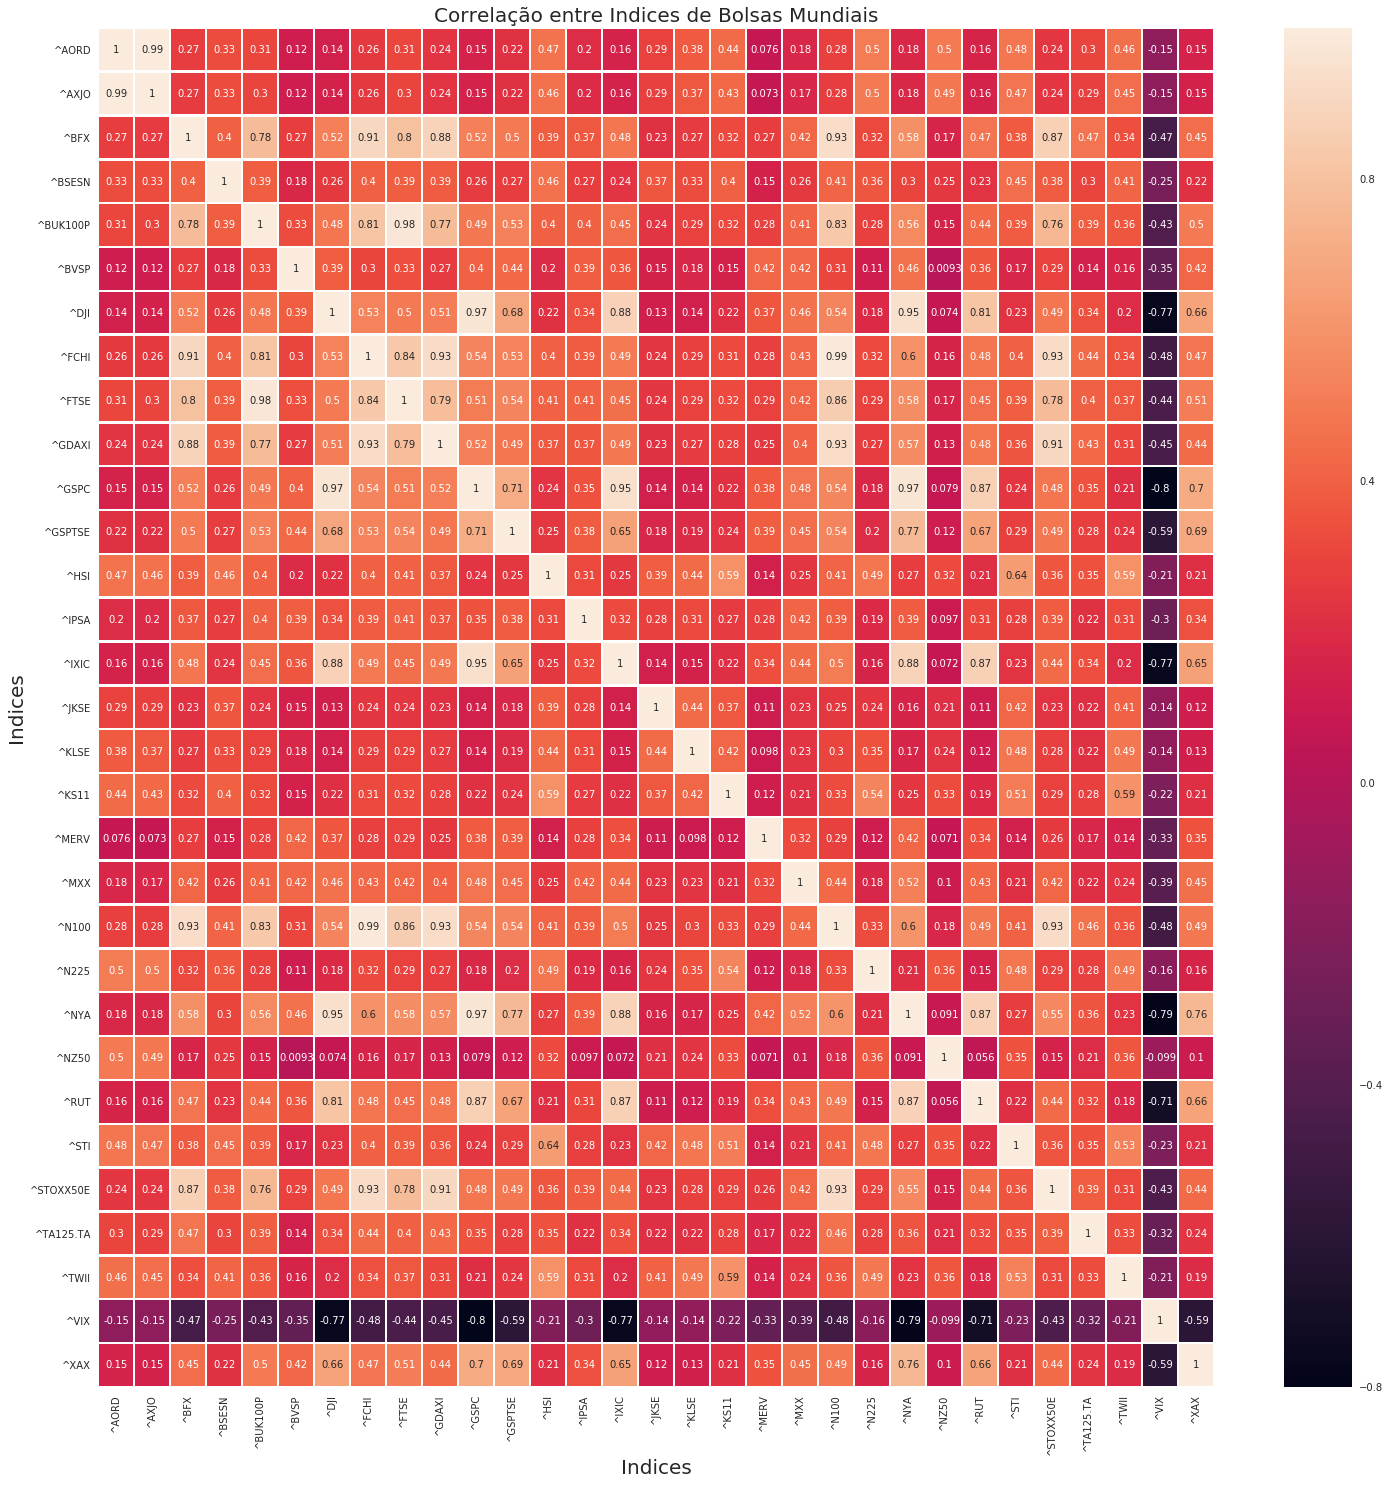

In [13]:
%matplotlib inline 
market_corr=market_close.pct_change().iloc[1:].corr()
fig = plt.subplots(figsize=(25,25))
ax2=plt.subplot(1,1,1)  
sns.heatmap(market_corr, annot=True, linewidths=1.5, ax=ax2)

ax2.set_ylabel("Indices",fontsize=20)  
ax2.set_xlabel("Indices",fontsize=20)  
ax2.set_title("Correlação entre Indices de Bolsas Mundiais",fontsize=20) 



<div id="DBSCAN">
    <h2>10) Clusterização DBSCAN</h2>
</div>

O método de clustering <b>DBSCAN</b> (Density-Based Spatial Clustering of Applications with Noise) é aplicado no aprendizado de máquina para separar clusters com a percepção de densidade. Nessse sentido, o <b>DBSCAN</b> é um algoritmo de cluster que faz seu trabalho procurando áreas nos dados com alta densidade de observações, em comparação com áreas dos dados que não são muito densas. 

Algoritmo <b>DBSCAN</b>: 
<ol> 
  <li>Selecione um ponto $\boldsymbol{p}$ na massa de dados aleatoriamente; </li> &emsp;
  <li>Mapeie todos os pontos $\boldsymbol{p_j}$ que são alcançaveis por $\boldsymbol{p}$ com um <b>eps</b> (distância) e <b>minpts</b> (número de pontos); </li> &emsp;
  <li> Se $\boldsymbol{p_j}$ é um ponto alcançável pertencem ao core de $\boldsymbol{p}$; </li> &emsp;
  <li>Se $\boldsymbol{p_j}$ é um ponto de fronteira, não alcançavel pela densidade de $\boldsymbol{p}$, realiza a visita um próximo ponto da base de dados;  </li> &emsp;
    <li>Continua o processo até que todos os pontos sejam processados, com a clareza que determinados pontos podem ficar fora do alcance (outliers); </li> &emsp;



</ol>
O exemplo será aplicado nos ativos do Índice Amplo B3 &emsp;


In [14]:
%matplotlib notebook 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

N_months=12

output = None
for i in range(1,13):

    df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/AcoesIndice.aspx?idioma=pt-BR&pg='+str(i))[0]['Código']
    print(len(df.values),i)
    if output is None:
        output = df          
    else:
        output=pd.concat([output,df],axis=0) 

output=output.dropna()

symbols=list(output.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]
#Stocks.append('^BVSP')


today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before=today - dt.timedelta(days=N_months*365/12)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

stocks_close=stocks_all['Adj Close'].dropna(axis=0, how='all')
stocks_close=stocks_close.dropna(axis=1, how='any')
stocks_open=stocks_all['Open'].dropna(axis=0, how='all')
stocks_open=stocks_open.dropna(axis=1, how='any')


41 1
41 2
41 3
41 4
41 5
41 6
41 7
41 8
41 9
41 10
41 11
32 12
[*********************100%***********************]  204 of 204 downloaded


In [15]:
stocks_close=stocks_all['Adj Close'].dropna(axis=0, how='all')
stocks_close=stocks_close.dropna(axis=1, how='any')
print()
print('Preços [R$]')
print(stocks_close[stocks_close.columns[:5]].head())
retornos=stocks_close.pct_change().dropna()
print()
print('Retornos [%]')
print(retornos[retornos.columns[:5]].head())
print()


Preços [R$]
            AALR3.SA  ABCB4.SA  ABEV3.SA  ADHM3.SA  AGRO3.SA
Date                                                        
2018-08-27     12.37     13.87     18.74      1.79     13.59
2018-08-28     12.52     13.83     18.72      1.66     13.77
2018-08-29     12.34     13.72     18.86      1.69     13.86
2018-08-30     12.50     13.53     18.62      1.60     13.82
2018-08-31     12.63     13.76     18.47      1.67     13.68

Retornos [%]
            AALR3.SA  ABCB4.SA  ABEV3.SA  ADHM3.SA  AGRO3.SA
Date                                                        
2018-08-28  0.012126 -0.002884 -0.001067 -0.072626  0.013245
2018-08-29 -0.014377 -0.007954  0.007479  0.018072  0.006536
2018-08-30  0.012966 -0.013848 -0.012725 -0.053254 -0.002886
2018-08-31  0.010400  0.016999 -0.008056  0.043750 -0.010130
2018-09-03  0.005542  0.003634 -0.011911 -0.029940  0.016082



Ativos com Melhor Relação em Cada Cluster: ['EGIE3.SA', 'MOVI3.SA', 'SQIA3.SA', 'IRBR3.SA', 'POSI3.SA']


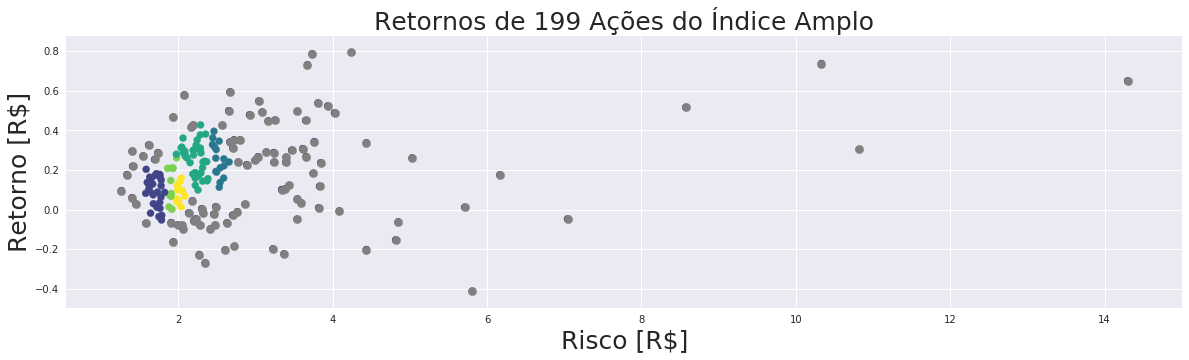

In [17]:
%matplotlib inline 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

stocks=retornos.columns
X=[[np.std(retornos[stocks[i]].astype(float)),np.mean(retornos[stocks[i]].astype(float))] for i in range(len(stocks))]
X=np.array(X)
#X = StandardScaler().fit_transform(X)

N=5

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

clustering = DBSCAN(eps=0.00075, min_samples=5).fit(X)
clustering.labels_
core_samples = clustering.core_sample_indices_
labels = clustering.labels_

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(100*X[:, 0], 100*X[:, 1], c=labels, s=50, cmap='viridis')
ax1.scatter(100*X[np.where(labels==-1),0],100*X[np.where(labels==-1),1][0], s=70, c='gray')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [R$]',fontsize=25)
ax1.set_ylabel('Retorno [R$]',fontsize=25)

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[list(retornos.columns[np.where(clustering.labels_==i)[0]])].astype(float).mean()/retornos[list(retornos.columns[np.where(clustering.labels_==i)[0]])].astype(float).std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

<b>Fim da Atividade!!!</b> 
